# Marketing Campaigns


## 1. Business Understanding

### Problem scenario: 
Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing: product, price, place, and promotion.

### Problem objective:
As a data scientist, you must conduct exploratory data analysis and hypothesis testing to enhance your comprehension of the diverse factors influencing customer acquisition.

### Data description:
The variables such as birth year, education, income, and others pertain to the first 'P' or 'People' in the tabular data presented to the user. The expenditures on items like wine, fruits, and gold, are associated with ‘Product’. Information relevant to sales channels, such as websites and stores, is connected to ‘Place’, and the fields discussing promotions and the outcomes of various campaigns are linked to ‘Promotion’.


Steps to perform:

	•	Create variables to represent the total number of children, age, and total spending.
	•	Derive the total purchases from the number of transactions across the three channels.
	

	•	Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.
	•	Apply ordinal and one-hot encoding based on the various types of categorical variables.
	•	Generate a heatmap to illustrate the correlation between different pairs of variables.

	•	Test the following hypotheses:
	•	Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.
	•	Customers with children likely experience time constraints, making online shopping a more convenient option.
	•	Sales at physical stores may face the risk of cannibalization by alternative distribution channels.
	•	Does the United States significantly outperform the rest of the world in total purchase volumes?


	•	Use appropriate visualization to help analyze the following:
	•	Identify the top-performing products and those with the lowest revenue.
	•	Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.
	•	Determine the country with the highest number of customers who accepted the last campaign.
	•	Investigate if there is a discernible pattern in the number of children at home and the total expenditure.
	•	Analyze the educational background of customers who lodged complaints in the last two years.



In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# For better visualizations
plt.style.use('ggplot')
sns.set(style="whitegrid")

## Dataset Overview

In [155]:
# Read data
df = pd.read_csv("data/marketing_data.csv")

# Display basic information
print(f"Dataset Shape: {df.shape}")
df.info(memory_usage="deep")

Dataset Shape: (2240, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non

In [156]:
# Display basic statistics for numerical columns
print("Summary Statistics for Categorical Variables:")
df.describe(include='O').T

Summary Statistics for Categorical Variables:


,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Income,2216,1974,"$7,500.00",12
Dt_Customer,2240,663,8/31/12,12
Country,2240,8,SP,1095


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*Dataset has 23 numeric columns and 5 sting columns.*

*Education, Marital_Status and Country are the categorical variables.*

*Income  should be cast to float. Income has missing values*

*Dt_Customer should be cast to date.*

*Almost 40% of data has Country=SP*


In [157]:
df['Education'].drop_duplicates()

0     Graduation
5            PhD
6       2n Cycle
11        Master
54         Basic
Name: Education, dtype: object

In [158]:
df['Marital_Status'].drop_duplicates()

0       Divorced
1         Single
2        Married
3       Together
12         Widow
103         YOLO
286        Alone
1068      Absurd
Name: Marital_Status, dtype: object

In [159]:
# Update Education '2n Cycle' with Masters (according to the internet it seems mean the same)
df['Education'] = df['Education'].apply(lambda x: x if x != '2n Cycle' else 'Master')
# Update Marital_Status with 2 categories Single and Married
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 'Married' or x == 'Togather' else 'Single')
# cast money to float
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)
# caste to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

In [160]:
df['Education'].drop_duplicates()

0     Graduation
5            PhD
6         Master
54         Basic
Name: Education, dtype: object

In [161]:
print("Statistical analysis:")
df.describe().T

Statistical analysis:


,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*__Year_Birth__:  min=1893 looks like outlier std=12 and mean=1970, so we need to filter out rows customers that birth earlier than 1934, which are 91 years old. Looks reasonable but customers may be older still, so we will check later.*
*__Income__: has missing values*
*__MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds__: data is left skewed and potentially has outliers*

## 2.2 Data Quality Assessment
Before drawing conclusions from the data, we need to assess its quality. Poor data quality can lead to inaccurate analysis and misleading insights.

We'll assess four key dimensions of data quality:

__Completeness__: Are there missing values?
__Correctness__: Are there outliers, duplicates, or invalid values?
__Relevance__: Are the variables distributed in a way that's useful for analysis?
__Trustworthiness__: Are there inconsistencies between related variables? Are data sources reliable?

### 2.2.1 Missing Values Analysis

Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average. 
It may be necessary to cleanse the data before proceeding. 
Specifically, scrutinize the categories of education and marital status for data cleaning.

In [162]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)
})

print("Missing Values Analysis:")
missing_values_filter = missing_df['Missing Values'] > 0
print(missing_df[missing_values_filter].sort_values(by='Percentage', ascending=False))

Missing Values Analysis:
        Missing Values  Percentage
Income              24        1.07


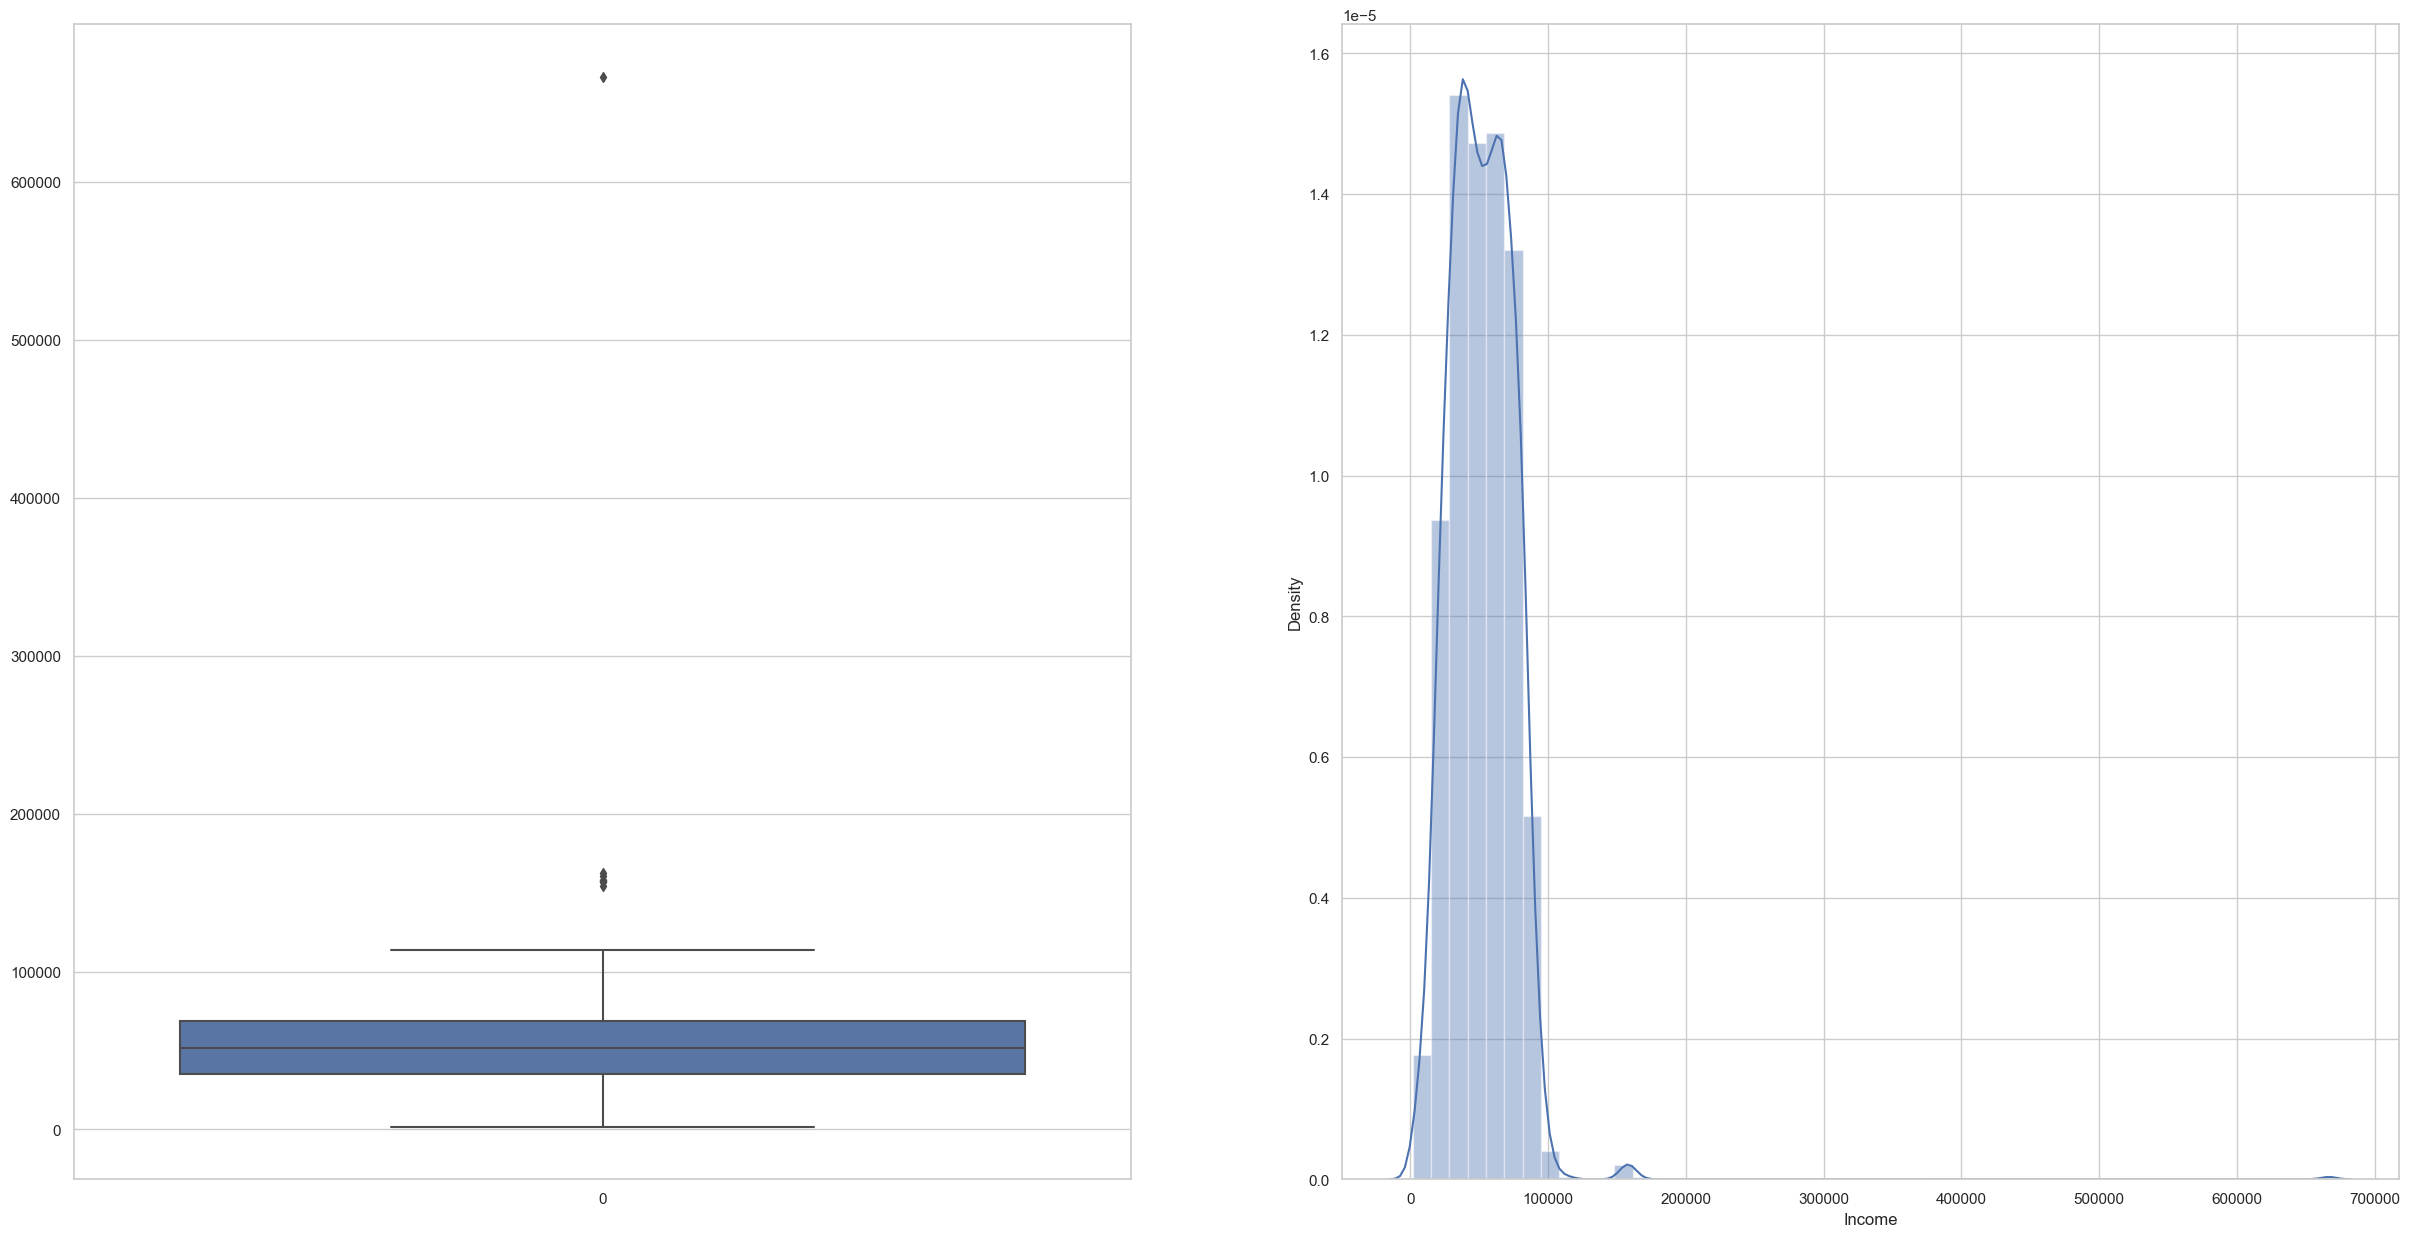

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=2, figsize=(30,15))
sns.boxplot(df['Income'], ax=axes[0])
sns.distplot(df['Income'], ax=axes[1])
plt.show()


#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 
*__Income__ has ~1% of missing values and data is skewed to right*  

In [164]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Single,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,Master,Married,NaN,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Single,NaN,0,1,2013-04-01,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,Master,Single,NaN,1,1,2014-01-12,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Single,NaN,1,1,2013-05-18,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [165]:
print(pd.__version__)

2.1.4


In [166]:
from feature_engine.imputation import MeanMedianImputer
mni = MeanMedianImputer(imputation_method="median")
mni.fit_transform(df)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/apoltavets/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/x8/ps_xddr95734lgrb6gqpr7g80000gp/T/ipykernel_18107/904717176.py", line 3, in <module>
    mni.fit_transform(df)
  File "/Users/apoltavets/anaconda3/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/Users/apoltavets/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 918, in fit_transform
    return self.fit(X, **fit_params).transform(X)
  File "/Users/apoltavets/anaconda3/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/Users/apoltavets/anaconda3/lib/python3.10/site-packages/feature_engine/imputation/base_imputer.py", line 63, in transform
    with pd.option_context("future.

In [ ]:
mni.imputer_dict_

In [ ]:
df1 = mni.transform(df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30,15))
sns.distplot(df['MntWines'], ax=axes[0, 0])
sns.distplot(df['MntFruits'], ax=axes[0,1])
sns.distplot(df['MntMeatProducts'], ax=axes[0,2])
sns.distplot(df['MntFishProducts'], ax=axes[1, 0])
sns.distplot(df['MntSweetProducts'], ax=axes[1,1])
sns.distplot(df['MntGoldProds'], ax=axes[1,2])

plt.show()


In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(1, 3))

fig, axes = plt.subplots(ncols=6, figsize=(18,9))
sns.boxplot(df['MntWines'], ax=axes[0])
sns.boxplot(df['MntFruits'], ax=axes[1])
sns.boxplot(df['MntMeatProducts'], ax=axes[2])
sns.boxplot(df['MntFishProducts'], ax=axes[3])
sns.boxplot(df['MntSweetProducts'], ax=axes[4])
sns.boxplot(df['MntGoldProds'], ax=axes[5])

#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*__MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds__: data is left skewed*
*__MntMeatProducts__: data has outliers with spends more than ~1500 for meet*
*__MntSweetProducts__: data has outliers with spends more than ~250 for sweets*


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, figsize=(10,15))
sns.distplot(df['Year_Birth'], ax=axes[0])
sns.distplot(df['Income'], ax=axes[1])

plt.show()

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(1, 3))

fig, axes = plt.subplots(ncols=2, figsize=(10,6))
sns.boxplot(df['Year_Birth'], ax=axes[0])
sns.boxplot(df['Income'], ax=axes[1])

#### ![](data/7611621.png)  &nbsp;&nbsp;   Analysis Notes: 

*__Year_Birth__: has outliers, data looks biased as we have more clients birth between 1970s and 1980s, which may reflect the country's population distribution*

*__Income__:  has outlier above 600 000, but *

In [ ]:
df[df['Year_Birth']< 1920].head()

In [ ]:
df[df['Income']> 600000].head()


2.2.1 Missing Values Analysis
Let's first check for missing values in the dataset. Missing data can impact our analysis and modeling approaches.

In [ ]:


# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()

# Summary of completeness
print("\nCompleteness Analysis:")
print(f"Total number of cells in the dataset: {df.size}")
print(f"Total number of missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / df.size * 100).round(2)}%")